In [185]:
import numpy as np
import keras
from keras.datasets import imdb
from keras import models, layers, regularizers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [186]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Decode all reviews to text format
train_text = [decode_review(review) for review in train_data]
test_text = [decode_review(review) for review in test_data]

In [187]:
# Use TF-IDF Vectorizer with n-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 5), max_features=25000)
X_train = vectorizer.fit_transform(train_text)
X_test = vectorizer.transform(test_text)

In [188]:
# Convert labels to numpy arrays
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [189]:
# Reorder sparse matrices to avoid serialization issues
X_train = X_train.sorted_indices()
X_val = X_val.sorted_indices()

# Build the neural network model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [190]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=6,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/6
40/40 [==============================] - 1s 29ms/step - loss: 0.7007 - accuracy: 0.6709 - val_loss: 0.6393 - val_accuracy: 0.8470
Epoch 2/6
40/40 [==============================] - 1s 27ms/step - loss: 0.5813 - accuracy: 0.8164 - val_loss: 0.4542 - val_accuracy: 0.8776
Epoch 3/6
40/40 [==============================] - 1s 31ms/step - loss: 0.4114 - accuracy: 0.8764 - val_loss: 0.3268 - val_accuracy: 0.8894
Epoch 4/6
40/40 [==============================] - 1s 28ms/step - loss: 0.3087 - accuracy: 0.9085 - val_loss: 0.2916 - val_accuracy: 0.8984
Epoch 5/6
40/40 [==============================] - 1s 32ms/step - loss: 0.2503 - accuracy: 0.9323 - val_loss: 0.2830 - val_accuracy: 0.9016
Epoch 6/6
40/40 [==============================] - 1s 28ms/step - loss: 0.2112 - accuracy: 0.9463 - val_loss: 0.2832 - val_accuracy: 0.9012


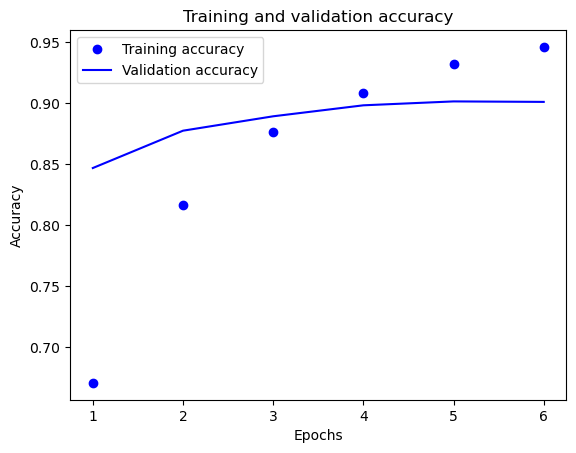

In [191]:
# Plot the training and validation accuracy
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [192]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


782/782 [==============================] - 1s 1ms/step - loss: 0.2852 - accuracy: 0.9002
Test Accuracy: 0.9002
